<a href="https://colab.research.google.com/github/pedro162/computer_vision/blob/main/machine_learn_avalicao_de_algoritmos_de_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/driver")


Mounted at /content/driver


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import pickle

In [6]:
with open("/content/driver/MyDrive/credit.pkl", 'rb') as f:
  X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = pickle.load(f)

In [7]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [8]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [9]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis=0)
X_credit.shape

(2000, 3)

In [10]:
X_credit

array([[-1.3754462 ,  0.50630999,  0.10980934],
       [ 1.45826409, -1.64894017, -1.21501497],
       [-0.79356829,  0.22531104, -0.43370226],
       ...,
       [ 1.37445674, -1.05746369, -1.12564819],
       [-1.57087737, -0.6348826 , -0.36981671],
       [-1.03572293, -0.93978209,  0.04244312]])

In [11]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)
y_credit.shape

(2000,)

In [12]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

##Árvore de decisão

In [13]:
parametros = {'criterion':['gini', 'entropy'],
              'splitter':['best', 'random'],
              'min_samples_split':[2, 5, 10],
              'min_samples_leaf':[1, 5, 10]
              }

In [14]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_
print(melhores_parametros)
print(melhores_resultados)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


##Random forest

In [15]:
parametros = {'criterion':['gini', 'entropy'],
              'n_estimators':[10, 40, 100, 150],
              'min_samples_split':[2, 5, 10],
              'min_samples_leaf':[1, 5, 10]
              }

In [16]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_
print(melhores_parametros)
print(melhores_resultados)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9865


## Knn

In [17]:
parametros = {'n_neighbors':[3, 5, 10, 20], 'p':[1, 2]}

In [18]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_
print(melhores_parametros)
print(melhores_resultados)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


##Regressão logística

In [19]:
parametros = {'tol':[0.00001, 0.000001, 0.0000001],
              'C':[1.0, 1.5, 2.0],
              'solver':['lbfgs', 'sag', 'saga']
              }

In [20]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_
print(melhores_parametros)
print(melhores_resultados)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 1e-05}
0.9484999999999999


##SVM

In [21]:
parametros = {'tol':[0.00001, 0.000001, 0.0000001],
              'C':[1.0, 1.5, 2.0],
              'kernel':['rbf', 'linear', 'poly', 'sigmoid']
              }

In [22]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_
print(melhores_parametros)
print(melhores_resultados)

{'C': 1.5, 'kernel': 'rbf', 'tol': 1e-05}
0.9829999999999999


## Redes neurais

In [23]:
parametros = {'activation':['relu', 'logistic', 'tahn'],
              'solver':['adam', 'sgd'],
              'batch_size':[10, 56]
              }

In [24]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_
#print(melhores_parametros)
#print(melhores_resultados)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [25]:
print(melhores_parametros)
print(melhores_resultados)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9964999999999999


## Validação cruzada

In [26]:
from sklearn.model_selection import cross_val_score, KFold

In [27]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural =[]

for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv=kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  ##Random forest
  random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
  scores = cross_val_score(random_forest, X_credit, y_credit, cv=kfold)
  resultados_random_forest.append(scores.mean())

  ##KNN
  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv=kfold)
  resultados_knn.append(scores.mean())


  ##Logistica
  logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv=kfold)
  resultados_logistica.append(scores.mean())


  ##SVM
  svm = SVC(kernel='rbf', C=2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv=kfold)
  resultados_svm.append(scores.mean())


  ##Rede neural
  rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv=kfold)
  resultados_rede_neural.append(scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [28]:
resultados_random_forest, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural

([0.985,
  0.9795,
  0.983,
  0.9800000000000001,
  0.985,
  0.9879999999999999,
  0.9844999999999999,
  0.982,
  0.984,
  0.9869999999999999,
  0.985,
  0.9855,
  0.984,
  0.9824999999999999,
  0.9819999999999999,
  0.9824999999999999,
  0.985,
  0.9874999999999998,
  0.9854999999999998,
  0.9844999999999999,
  0.9829999999999999,
  0.985,
  0.9850000000000001,
  0.9879999999999999,
  0.985,
  0.9814999999999999,
  0.983,
  0.9854999999999998,
  0.983,
  0.9834999999999999],
 [0.985,
  0.9795,
  0.983,
  0.9800000000000001,
  0.985,
  0.9879999999999999,
  0.9844999999999999,
  0.982,
  0.984,
  0.9869999999999999,
  0.985,
  0.9855,
  0.984,
  0.9824999999999999,
  0.9819999999999999,
  0.9824999999999999,
  0.985,
  0.9874999999999998,
  0.9854999999999998,
  0.9844999999999999,
  0.9829999999999999,
  0.985,
  0.9850000000000001,
  0.9879999999999999,
  0.985,
  0.9814999999999999,
  0.983,
  0.9854999999999998,
  0.983,
  0.9834999999999999],
 [0.9814999999999999,
  0.979999999999

In [29]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest, 'Knn': resultados_knn, 'Logistica': resultados_logistica, 'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})

In [30]:
resultados

,Arvore,Random forest,Knn,Logistica,SVM,Rede neural
0,0.9865,0.9850,0.9815,0.9475,0.9845,0.9975
1,0.9860,0.9795,0.9800,0.9465,0.9840,0.9970
2,0.9905,0.9830,0.9795,0.9470,0.9865,0.9975
3,0.9870,0.9800,0.9780,0.9460,0.9850,0.9970
4,0.9880,0.9850,0.9820,0.9465,0.9850,0.9975
5,0.9890,0.9880,0.9780,0.9465,0.9845,0.9975
6,0.9885,0.9845,0.9805,0.9470,0.9860,0.9960
7,0.9875,0.9820,0.9800,0.9480,0.9850,0.9970
8,0.9865,0.9840,0.9795,0.9465,0.9840,0.9970
9,0.9875,0.9870,0.9820,0.9465,0.9845,0.9965


In [31]:
resultados.describe()

,Arvore,Random forest,Knn,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987300,0.984150,0.980050,0.946950,0.985083,0.997050
std,0.001836,0.002085,0.001533,0.000687,0.001280,0.000497
min,0.982000,0.979500,0.977000,0.945500,0.982000,0.996000
25%,0.986500,0.983000,0.979000,0.946500,0.984125,0.997000
50%,0.987250,0.984500,0.980000,0.947000,0.985000,0.997000
75%,0.988500,0.985000,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.988000,0.982500,0.948500,0.987500,0.998000


In [32]:
resultados.var()

,0
Arvore,3.372414e-06
Random forest,4.347414e-06
Knn,2.350862e-06
Logistica,4.715517e-07
SVM,1.639368e-06
Rede neural,2.474138e-07


In [33]:
(resultados.std()/resultados.mean()) *100

,0
Arvore,0.186004
Random forest,0.211863
Knn,0.156446
Logistica,0.072517
SVM,0.129977
Rede neural,0.049888


##Teste de normalidade nos resultados



*   Shapiro: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wik_test



In [34]:
alpha = 0.05

In [35]:

from scipy.stats import shapiro

In [36]:
import seaborn as sns

In [37]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9493548856370204, pvalue=0.16246108956116034),
 ShapiroResult(statistic=0.9639321812074391, pvalue=0.38877054194757776),
 ShapiroResult(statistic=0.9584024823930501, pvalue=0.2818135378764127),
 ShapiroResult(statistic=0.9370947605502944, pvalue=0.07597949435132455),
 ShapiroResult(statistic=0.9622985607506823, pvalue=0.3541579284945434),
 ShapiroResult(statistic=0.909149845408828, pvalue=0.01416447753000253))

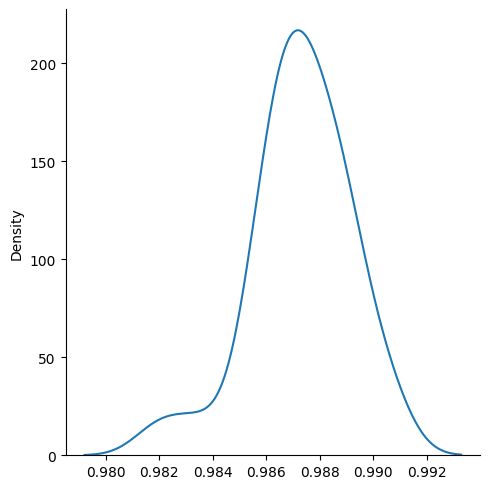

In [38]:
sns.displot(resultados_arvore, kind='kde');

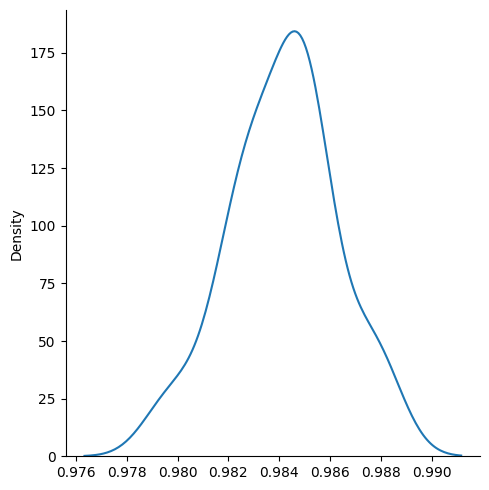

In [39]:
sns.displot(resultados_random_forest, kind='kde');


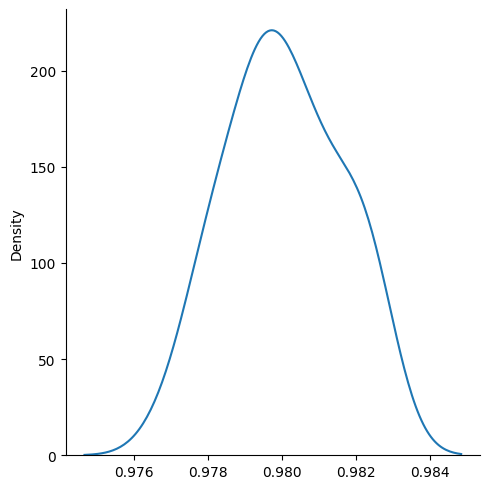

In [40]:
sns.displot(resultados_knn, kind='kde');

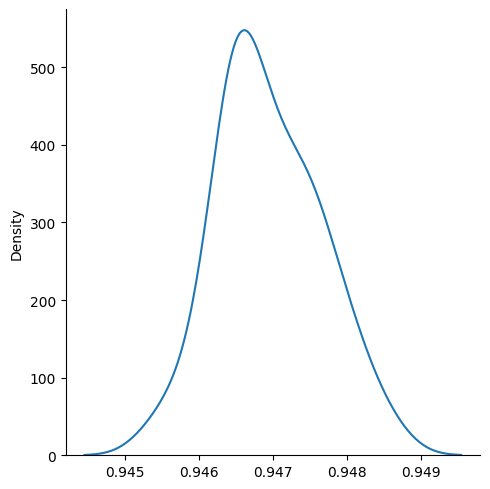

In [41]:
sns.displot(resultados_logistica, kind='kde');

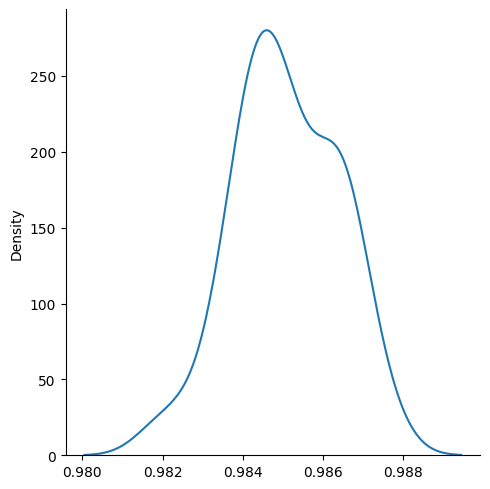

In [42]:
sns.displot(resultados_svm, kind='kde');

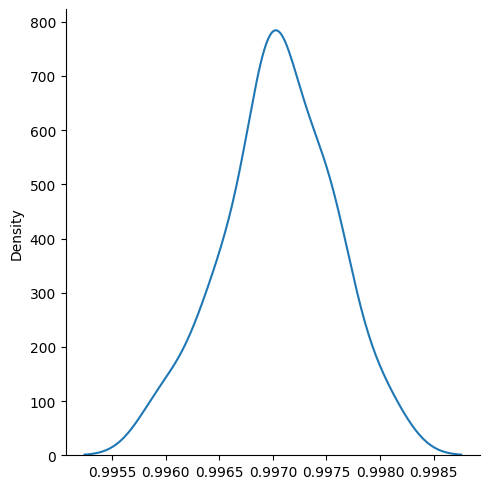

In [43]:
sns.displot(resultados_rede_neural, kind='kde');

## Teste de hipótese com ANOVA e Tukey

In [44]:
from scipy.stats import f_oneway

In [45]:
p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

F_onewayResult(statistic=4284.723616858994, pvalue=4.209176185939801e-180)

In [46]:
p.pvalue

4.209176185939801e-180

In [47]:
alpha = 0.05
if p.pvalue <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [48]:
algoritimo = []
algorimos_titulo = ['arvore', 'random_forest', 'knn', 'logistica', 'svm', 'neural']
for alg in algorimos_titulo:
  for i in range(30):
    algoritimo.append(alg)

In [49]:
algoritimo.count('arvore')

30

In [50]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]), 'algoritimo':algoritimo}

In [51]:
resultado_df = pd.DataFrame(resultados_algoritmos)
resultado_df

,accuracy,algoritimo
0,0.9865,arvore
1,0.9860,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9880,arvore
...,...,...
175,0.9975,neural
176,0.9975,neural
177,0.9965,neural
178,0.9970,neural


In [52]:
from statsmodels.stats.multicomp import MultiComparison

In [53]:
compara_algoritmos = MultiComparison(resultado_df['accuracy'], resultado_df['algoritimo'])

In [54]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0072    0.0 -0.0083 -0.0062   True
       arvore     logistica  -0.0403    0.0 -0.0414 -0.0393   True
       arvore        neural   0.0098    0.0  0.0087  0.0108   True
       arvore random_forest  -0.0031    0.0 -0.0042 -0.0021   True
       arvore           svm  -0.0022    0.0 -0.0033 -0.0011   True
          knn     logistica  -0.0331    0.0 -0.0342  -0.032   True
          knn        neural    0.017    0.0  0.0159  0.0181   True
          knn random_forest   0.0041    0.0   0.003  0.0052   True
          knn           svm    0.005    0.0   0.004  0.0061   True
    logistica        neural   0.0501    0.0   0.049  0.0512   True
    logistica random_forest   0.0372    0.0  0.0361  0.0383   True
    logistica           svm   0.0381    0.0  0.0371  0.0392   

In [55]:
resultados.min()

,0
Arvore,0.9820
Random forest,0.9795
Knn,0.9770
Logistica,0.9455
SVM,0.9820
Rede neural,0.9960


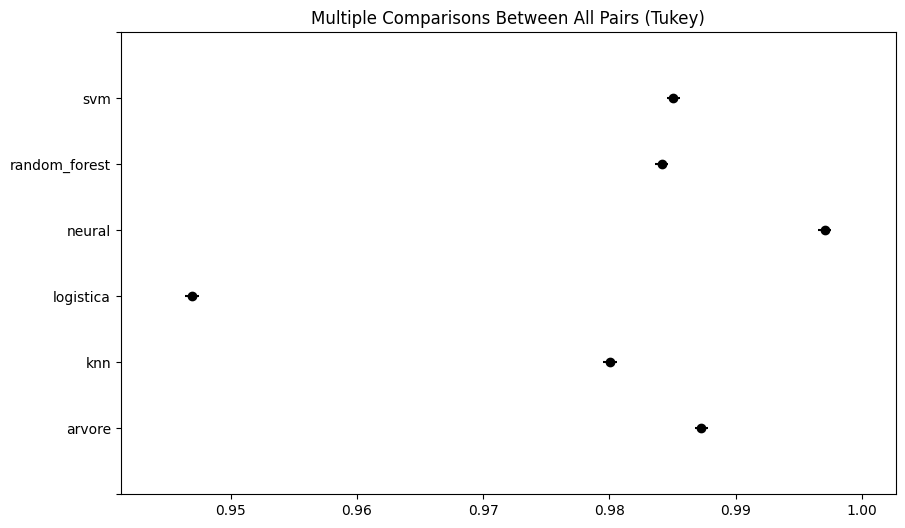

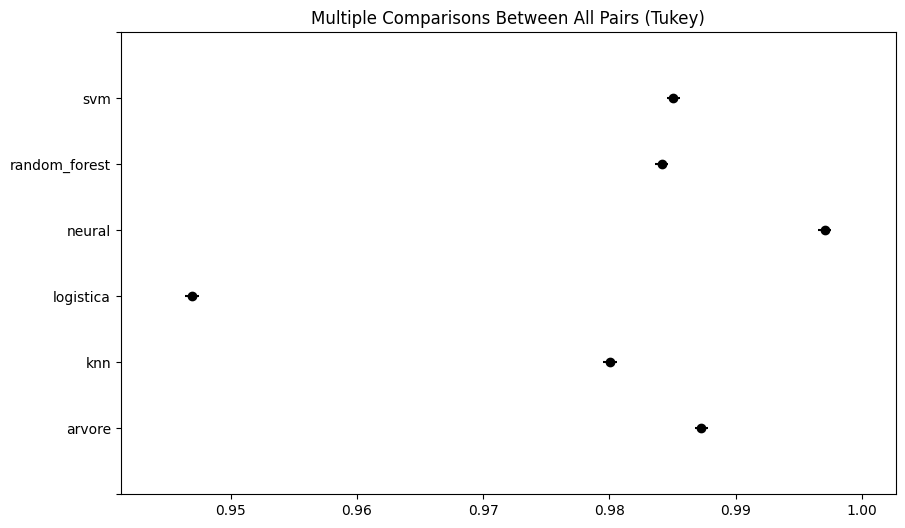

In [56]:
teste_estatistico.plot_simultaneous()

##Salvar um classificador já treinado

In [57]:
with open("/content/driver/MyDrive/credit.pkl", 'rb') as f:
  X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = pickle.load(f)

In [58]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis=0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)

In [59]:
X_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [61]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [62]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [63]:
classificador_svm = SVC(kernel='rbf', C=2.0)
classificador_svm.fit(X_credit, y_credit)

SVC(C=2.0)

In [64]:
pickle.dump(classificador_rede_neural, open("/content/driver/MyDrive/rede_nerual_finalizado.sav", 'wb'))
pickle.dump(classificador_arvore, open("/content/driver/MyDrive/arvore_finalizado.sav", 'wb'))
pickle.dump(classificador_svm, open("/content/driver/MyDrive/svm_finalizado.sav", 'wb'))

### Carregar um classificador já treinado

In [65]:
rede_neural = pickle.load(open("/content/driver/MyDrive/rede_nerual_finalizado.sav", 'rb'))
arvore = pickle.load(open("/content/driver/MyDrive/arvore_finalizado.sav", 'rb'))
svm = pickle.load(open("/content/driver/MyDrive/svm_finalizado.sav", 'rb'))

In [66]:
novo_registro = X_credit[1999]
novo_registro

array([-1.03572293, -0.93978209,  0.04244312])

In [67]:
novo_registro.shape

(3,)

In [68]:
rede_neural.predict(novo_registro.reshape(1,-1))

array([1])

In [69]:
arvore.predict(novo_registro.reshape(1,-1))

array([1])

In [70]:
svm.predict(novo_registro.reshape(1,-1))

array([1])